# Python 的 50+ 練習：資料科學學習手冊

> 資料科學模組 seaborn 入門

[數聚點](https://www.datainpoint.com/) | 郭耀仁 <https://linktr.ee/yaojenkuo>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 這個章節會登場的模組

`seaborn` 模組。

## 關於 Seaborn

## 什麼是 Seaborn

> Seaborn 是 Python 資料視覺化的第三方模組，基於 Matplotlib、能夠簡單地建立統計圖形。

來源：<https://seaborn.pydata.org/>

## Seaborn 的使用優勢

- 基於 Matplotlib 的高階模組，使用起來簡潔容易。
- 與 Pandas 的 `Series` 和 `DataFrame` 運作順暢。

## 根據說明文件的範例載入

來源：<https://seaborn.pydata.org/introduction.html>

In [2]:
import seaborn as sns

## （沒什麼用的冷知識）sns 是 Samuel Norman Seaborn 的縮寫

美國影集 The West Wing 的主角。

來源：<https://en.wikipedia.org/wiki/Sam_Seaborn>

## 如果環境中沒有安裝 Seaborn，載入時會遭遇 `ModuleNotFoundError`

```
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
ModuleNotFoundError: No module named 'seaborn'
```

## 如果遭遇 `ModuleNotFoundError` 可以在終端機使用 `pip install seaborn` 或者 `conda install seaborn` 指令安裝

若要指定模組版本可以加上 `==MAJOR.MINOR.PATCH` 課程使用的模組版本為 0.11

```bash
pip install seaborn==0.11
```
或者

```bash
conda install seaborn==0.11
```

## 可以透過兩個屬性檢查版本號與安裝路徑

- `__version__` 屬性檢查版本號。
- `__file__` 屬性檢查安裝路徑。

In [3]:
print(sns.__version__)
print(sns.__file__)

0.11.2
/Users/kuoyaojen/opt/miniconda3/envs/python39/lib/python3.9/site-packages/seaborn/__init__.py


## Seaborn 的語法是函數導向風格，與 Pyplot 的物件導向風格有別

- 資料格式多元：
    - `list`
    - `ndarray`
    - `Series`
    - `DataFrame`

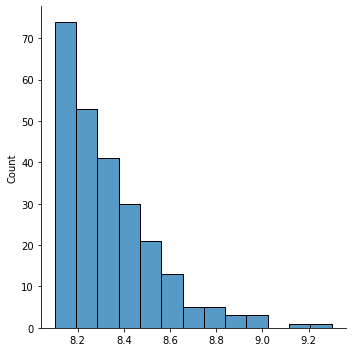

In [4]:
movies = pd.read_csv("https://raw.githubusercontent.com/datainpoint/classroom-hahow-pythonfiftyplus/main/data/internet-movie-database/movies.csv")
ratings = movies["rating"].values
sns.displot(ratings) # plotting with ndarray
plt.show()

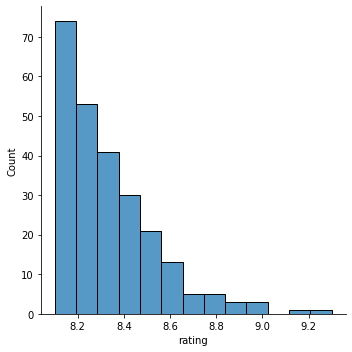

In [5]:
sns.displot(x="rating", data=movies) # plotting with dataframe
plt.show()

## Seaborn 視覺化函數

## Seaborn 不同的函數對應不同的主要圖形

- `sns.displot()` 觀察分配的直方圖。
- `sns.scatterplot()` 觀察相關的散佈圖。
- `sns.lineplot()` 觀察趨勢的線圖。
- `sns.barplot()` 觀察排序的長條圖。
- `sns.countplot()` 觀察頻率的計數圖。
- ...等。

## 觀察分配的直方圖

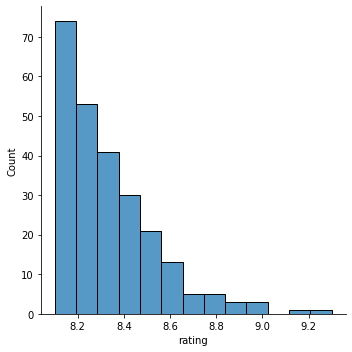

In [6]:
sns.displot(x="rating", data=movies)
plt.show()

## 觀察相關的散佈

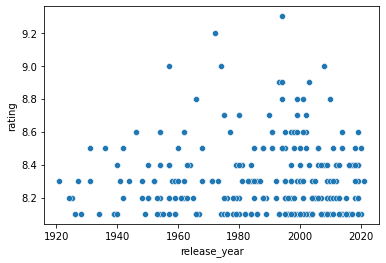

In [7]:
sns.scatterplot(x="release_year", y="rating", data=movies)
plt.show()

## 觀察趨勢的線圖

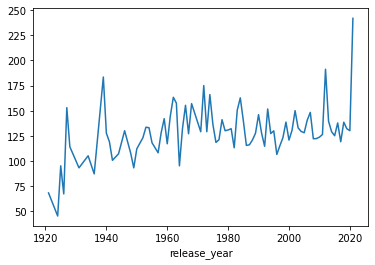

In [8]:
runtime_by_years = movies.groupby("release_year")["runtime"].mean()
sns.lineplot(x=runtime_by_years.index, y=runtime_by_years.values) # plotting with Series
plt.show()

## 觀察排序的長條圖

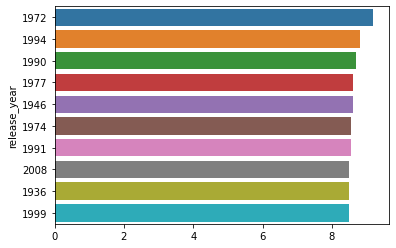

In [9]:
rating_by_years = movies.groupby("release_year")["rating"].mean().sort_values(ascending=False)
top_ten_rating_by_years = rating_by_years[:10]
sns.barplot(x=top_ten_rating_by_years.values, y=top_ten_rating_by_years.index.astype(str))
plt.show()

## 觀察頻率的長條圖

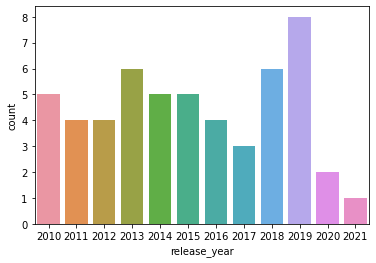

In [10]:
sns.countplot(x="release_year", data=movies[movies["release_year"] >= 2010])
plt.show()

## 添加圖形元素

## 常用的圖形元素

- 調整風格、調色盤與瀏覽裝置。
- 旋轉軸刻度標記。
- 利用 `hue` 參數添加顏色註記。
- 添加標題與軸標籤。

## 如何調整風格、調色盤與瀏覽裝置

- 使用 `sns.set_style()` 函數調整風格。
- 使用 `sns.set_palette()` 函數調整色盤。
- 使用 `sns.set_context()` 函數調整瀏覽裝置。

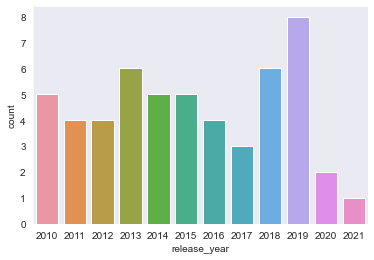

In [11]:
sns.set_style("dark") # "white","dark","whitegrid","darkgrid","ticks"
sns.countplot(x="release_year", data=movies[movies["release_year"] >= 2010])
plt.show()

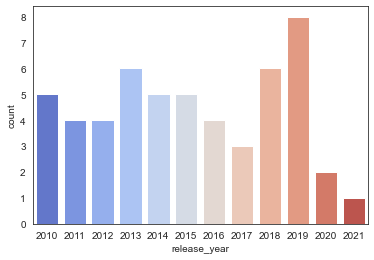

In [12]:
sns.set_style("white") # "white","dark","whitegrid","darkgrid","ticks"
sns.set_palette(sns.color_palette('coolwarm', n_colors=12)) # https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial
sns.countplot(x="release_year", data=movies[movies["release_year"] >= 2010])
plt.show()

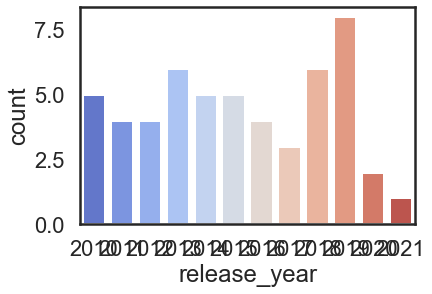

In [13]:
sns.set_style("white") # "white","dark","whitegrid","darkgrid","ticks"
sns.set_palette(sns.color_palette('coolwarm', n_colors=12)) # https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial
sns.set_context("poster") # "paper","notebook","talk","poster"
sns.countplot(x="release_year", data=movies[movies["release_year"] >= 2010])
plt.show()

## 如何旋轉軸刻度標記

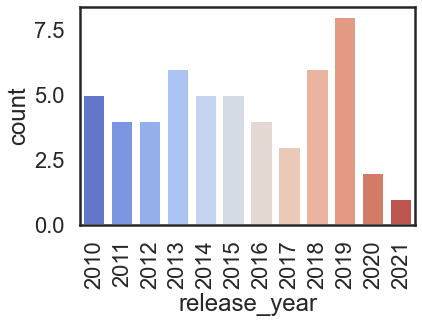

In [14]:
sns.countplot(x="release_year", data=movies[movies["release_year"] >= 2010])
plt.xticks(rotation=90)
plt.show()

## 如何利用 `hue` 參數添加顏色註記

In [15]:
# Adds a binary text column to movies
before_after_millennium = movies["release_year"].map(lambda x: 'After millennium' if x >= 2000 else 'Before millennium')
movies = movies.assign(before_after_millennium = before_after_millennium)
movies

,id,title,release_year,rating,director,runtime,before_after_millennium
0,1,The Shawshank Redemption,1994,9.3,Frank Darabont,142,Before millennium
1,2,The Godfather,1972,9.2,Francis Ford Coppola,175,Before millennium
2,3,The Godfather: Part II,1974,9.0,Francis Ford Coppola,202,Before millennium
3,4,The Dark Knight,2008,9.0,Christopher Nolan,152,After millennium
4,5,12 Angry Men,1957,9.0,Sidney Lumet,96,Before millennium
...,...,...,...,...,...,...,...
245,246,Neon Genesis Evangelion: The End of Evangelion,1997,8.1,Hideaki Anno,87,Before millennium
246,247,7 Kogustaki Mucize,2019,8.2,Mehmet Ada Öztekin,132,After millennium
247,248,Tangerines,2013,8.2,Zaza Urushadze,87,After millennium
248,249,Drishyam,2015,8.2,Nishikant Kamat,163,After millennium


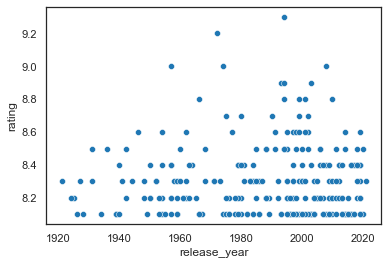

In [16]:
sns.set_style("white") # "white","dark","whitegrid","darkgrid","ticks"
sns.set_palette("tab10")
sns.set_context("notebook")
sns.scatterplot(x="release_year", y="rating", data=movies) # hue was not added
plt.show()

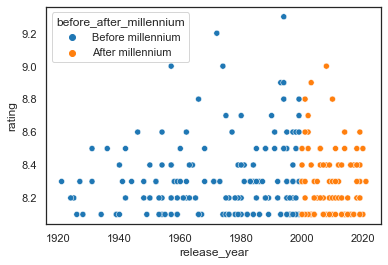

In [17]:
sns.scatterplot(x="release_year", y="rating", hue="before_after_millennium", data=movies) # hue was added
plt.show()

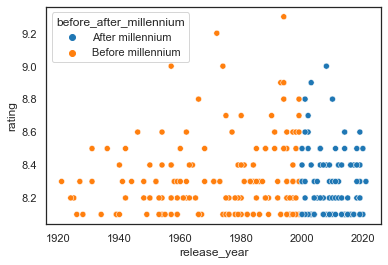

In [18]:
sns.scatterplot(x="release_year", y="rating", hue="before_after_millennium", data=movies,
               hue_order=["After millennium", "Before millennium"]) # hue/hue_order was added
plt.show()

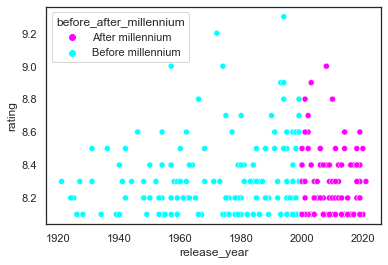

In [19]:
hue_colors = {
    "Before millennium": "cyan",
    "After millennium": "magenta"
}
sns.scatterplot(x="release_year", y="rating", hue="before_after_millennium", data=movies,
                hue_order=["After millennium", "Before millennium"],
                palette=hue_colors) # hue/hue_order/palette was added
plt.show()

## 顏色註記接受多種輸入格式

<https://matplotlib.org/stable/tutorials/colors/colors.html>

## 如何添加標題與軸標籤

- 辨識 Seaborn 生成的物件類別
    - 不可以繪製子圖的生成 `AxesSubplot` 物件。
    - 可以繪製子圖的（例如 `sns.relplot()` 函數）生成 `FacetGrid` 物件。

## 不可以繪製子圖的生成 `AxesSubplot` 物件

- 使用 `AxesSubplot.set_title()` 添加標題。
- 使用 `AxesSubplot.set(xlabel=..., ylabel=...)` 添加軸標籤。

<class 'matplotlib.axes._subplots.AxesSubplot'>


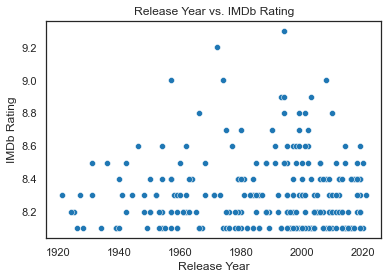

In [20]:
g = sns.scatterplot(x="release_year", y="rating", data=movies)
print(type(g))
g.set_title("Release Year vs. IMDb Rating")
g.set(xlabel="Release Year", ylabel="IMDb Rating")
plt.show()

## 繪製子圖

## 利用 `sns.relplot()` 函數繪製子圖

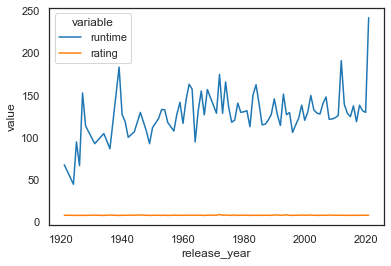

In [21]:
# Weird lineplots
runtime_rating_by_years = movies.groupby("release_year")[["runtime", "rating"]].mean().reset_index()
runtime_rating_by_years_long = pd.melt(runtime_rating_by_years, id_vars="release_year", var_name="variable", value_name="value")
sns.set_style("white") # "white","dark","whitegrid","darkgrid","ticks"
sns.set_palette("tab10")
sns.set_context("notebook")
sns.lineplot(x="release_year", y="value", hue="variable", data=runtime_rating_by_years_long)
plt.show()

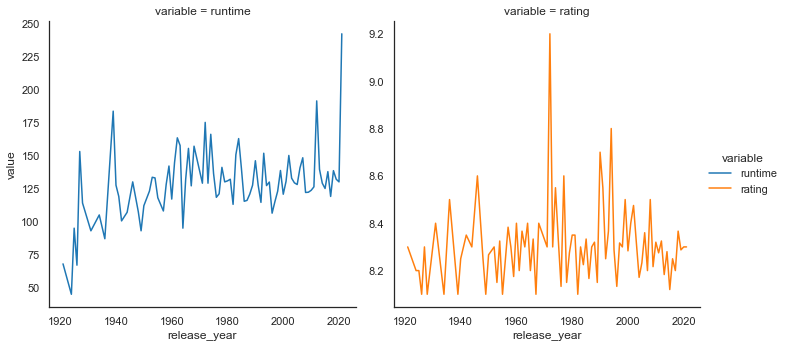

In [22]:
sns.relplot(x="release_year", y="value",
            col="variable", kind="line", hue="variable",
            data=runtime_rating_by_years_long, facet_kws={'sharey': False, 'sharex': True})
plt.show()

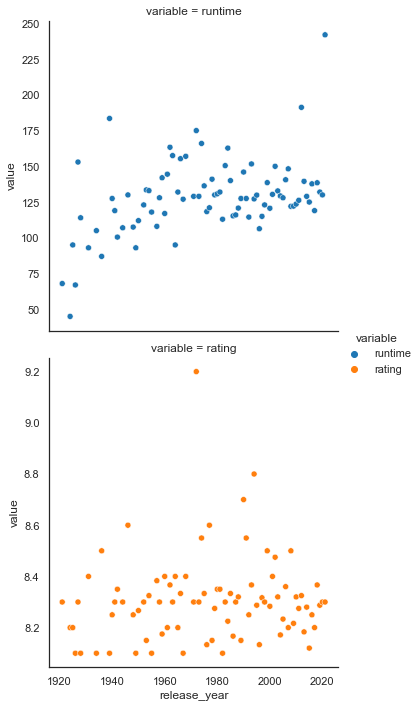

In [23]:
sns.relplot(x="release_year", y="value",
            row="variable", kind="scatter", hue="variable",
            data=runtime_rating_by_years_long, facet_kws={'sharey': False, 'sharex': True})
plt.show()

## （複習）如何添加標題與軸標籤

- 辨識 Seaborn 生成的物件類別
    - 不可以繪製子圖的生成 `AxesSubplot` 物件。
    - 可以繪製子圖的（例如 `sns.relplot()`、`sns.catplot()`函數）生成 `FacetGrid` 物件。

## 可以繪製子圖的生成 `FacetGrid` 物件

- 使用 `FacetGrid.fig.suptitle()` 添加標題。
- 使用 `FacetGrid.set_titles()` 添加子圖標題。
- 使用 `FacetGrid.set(xlabel=..., ylabel=...)` 添加軸標籤。

<class 'seaborn.axisgrid.FacetGrid'>


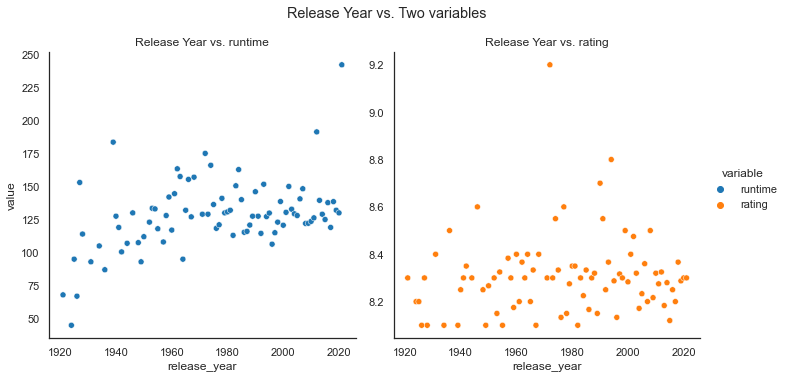

In [24]:
g = sns.relplot(x="release_year", y="value",
                col="variable", kind="scatter", hue="variable",
                data=runtime_rating_by_years_long, facet_kws={'sharey': False, 'sharex': True})
print(type(g))
g.fig.suptitle("Release Year vs. Two variables", y=1.05) # moves title 1.05x higher
g.set_titles("Release Year vs. {col_name}")
plt.show()

## 重點統整

- Seaborn 的語法是函數導向風格，與 Pyplot 的物件導向風格有別。
- Seaborn 不同的函數對應不同的主要圖形：
    - `sns.displot()` 觀察分配的直方圖。
    - `sns.scatterplot()` 觀察相關的散佈圖。
    - `sns.lineplot()` 觀察趨勢的線圖。
    - `sns.barplot()` 觀察排序的長條圖。
    - `sns.countplot()` 觀察頻率的計數圖。
    - ...等。

## 重點統整（續）

- 常用的圖形元素
    - 調整風格、調色盤與瀏覽裝置。
    - 旋轉軸刻度標記。
    - 利用 `hue` 參數添加顏色註記。
    - 添加標題與軸標籤。